In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("Air Quality in Indian Cities.csv")

In [4]:
data

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Vijayawada,"Rajiv Nagar, Vijayawada - APPCB",08-04-2025 15:00,16.554731,80.649110,NO2,NaN,NaN,NaN
1,India,Andhra_Pradesh,Vijayawada,"Rajiv Nagar, Vijayawada - APPCB",08-04-2025 15:00,16.554731,80.649110,NH3,NaN,NaN,NaN
2,India,Assam,Byrnihat,"Central Academy for SFS, Byrnihat - PCBA",08-04-2025 15:00,26.071318,91.874880,CO,41.0,60.0,58.0
3,India,Assam,Byrnihat,"Central Academy for SFS, Byrnihat - PCBA",08-04-2025 15:00,26.071318,91.874880,OZONE,21.0,66.0,35.0
4,India,Assam,Guwahati,"IITG, Guwahati - PCBA",08-04-2025 15:00,26.202864,91.700464,PM2.5,70.0,313.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...
3226,India,West_Bengal,Kolkata,"Jadavpur, Kolkata - WBPCB",08-04-2025 15:00,22.499290,88.369170,PM2.5,49.0,84.0,60.0
3227,India,West_Bengal,Kolkata,"Jadavpur, Kolkata - WBPCB",08-04-2025 15:00,22.499290,88.369170,PM10,47.0,89.0,60.0
3228,India,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",08-04-2025 15:00,22.511060,88.351420,PM2.5,14.0,44.0,23.0
3229,India,West_Bengal,Siliguri,"Ward-32 Bapupara, Siliguri - WBPCB",08-04-2025 15:00,26.687923,88.415250,PM2.5,69.0,206.0,119.0


In [5]:
# to check missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3231 non-null   object 
 1   state          3231 non-null   object 
 2   city           3231 non-null   object 
 3   station        3231 non-null   object 
 4   last_update    3231 non-null   object 
 5   latitude       3231 non-null   float64
 6   longitude      3231 non-null   float64
 7   pollutant_id   3231 non-null   object 
 8   pollutant_min  2992 non-null   float64
 9   pollutant_max  2992 non-null   float64
 10  pollutant_avg  2992 non-null   float64
dtypes: float64(5), object(6)
memory usage: 277.8+ KB


In [6]:
# to convert a col datatype in Timestamp format
pd.to_datetime(data['last_update'])

0      2025-08-04 15:00:00
1      2025-08-04 15:00:00
2      2025-08-04 15:00:00
3      2025-08-04 15:00:00
4      2025-08-04 15:00:00
               ...        
3226   2025-08-04 15:00:00
3227   2025-08-04 15:00:00
3228   2025-08-04 15:00:00
3229   2025-08-04 15:00:00
3230   2025-08-04 15:00:00
Name: last_update, Length: 3231, dtype: datetime64[ns]

In [7]:
data['last_update'] = pd.to_datetime(data['last_update'])

In [8]:
data.info()  #checking null missing or null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   country        3231 non-null   object        
 1   state          3231 non-null   object        
 2   city           3231 non-null   object        
 3   station        3231 non-null   object        
 4   last_update    3231 non-null   datetime64[ns]
 5   latitude       3231 non-null   float64       
 6   longitude      3231 non-null   float64       
 7   pollutant_id   3231 non-null   object        
 8   pollutant_min  2992 non-null   float64       
 9   pollutant_max  2992 non-null   float64       
 10  pollutant_avg  2992 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 277.8+ KB


In [9]:
data.isnull().sum() #checking null missing or null values

country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    239
pollutant_max    239
pollutant_avg    239
dtype: int64

In [10]:
data.dropna(inplace = True) # doppning the rows which are having null values

In [11]:
data.isnull().sum() # verifying

country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64

We want to see how the average levels of different pollutants (like PM2.5, CO, NO2) vary across the top 10 Indian cities.

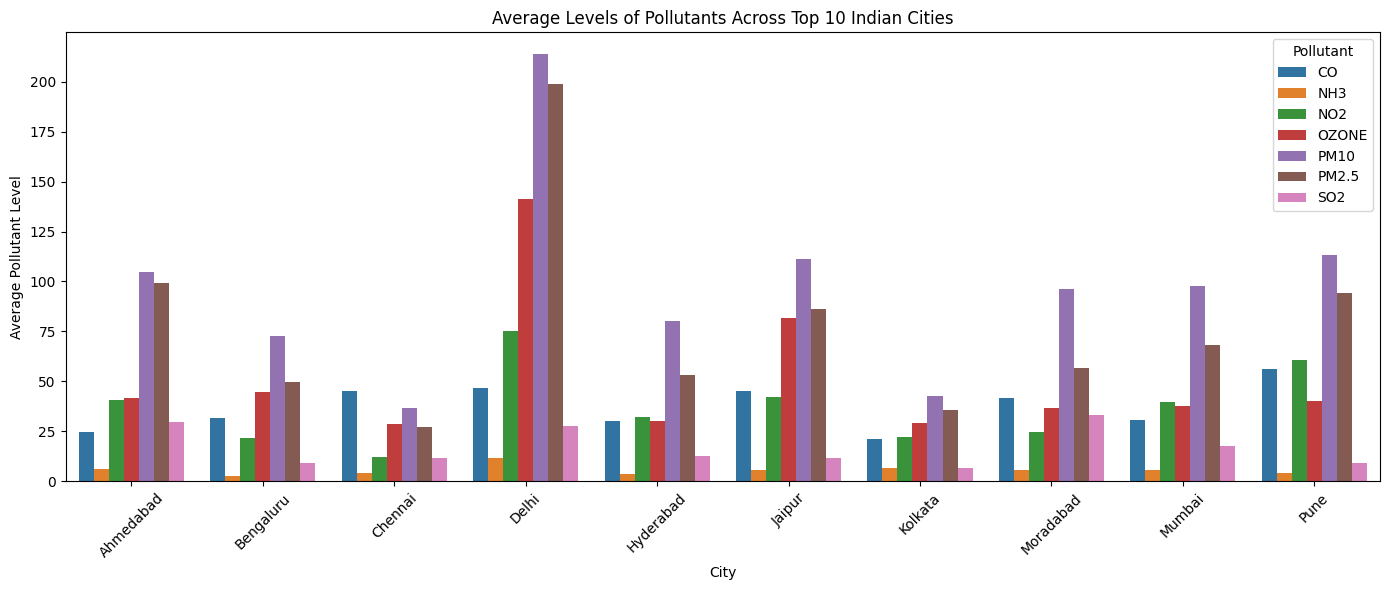

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# top cities or most appeared cities based on data count, inde will return the name of the city
top_cities = data['city'].value_counts().head(10).index

# it filters the data for top cities, groups it by city and pollutant type, calculates the average pollutant level, and resets the index 
city_pollutant_avg = data[data['city'].isin(top_cities)].groupby(['city', 'pollutant_id'])['pollutant_avg'].mean().reset_index()

# Step 3: Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=city_pollutant_avg, x='city', y='pollutant_avg', hue='pollutant_id')
plt.title('Average Levels of Pollutants Across Top 10 Indian Cities')
plt.xlabel('City')
plt.ylabel('Average Pollutant Level')
plt.xticks(rotation=45)
plt.legend(title='Pollutant')
plt.tight_layout()
plt.show()


 To compare the average PM2.5 pollutant levels across different Indian states and identify the regions 
with relatively poor or better air quality based on fine particulate matter concentration.

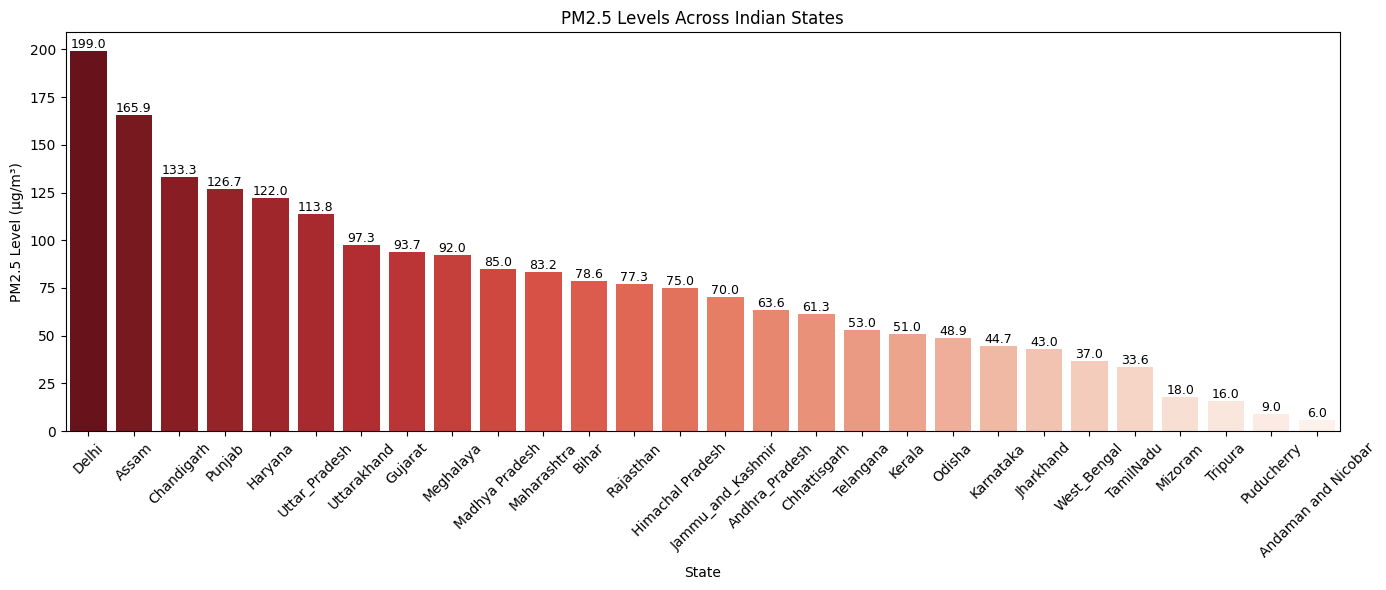

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for PM2.5 only
pm25_data = data[data['pollutant_id'] == 'PM2.5']

# Group by state and calculate average PM2.5
state_pm25_avg = pm25_data.groupby('state')['pollutant_avg'].mean().reset_index()

# Sort the values for better visual (descending)
state_pm25_avg = state_pm25_avg.sort_values(by='pollutant_avg', ascending=False)

# Plot the bar chart
plt.figure(figsize=(14, 6))
barplot = sns.barplot(data=state_pm25_avg, x='state', y='pollutant_avg', hue = 'state' ,palette='Reds_r')

# Annotate values on top of bars
for bar in barplot.patches:
    height = bar.get_height()
    if not pd.isna(height) and height > 0:
        barplot.annotate(
            f'{height:.1f}',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            ha='center', va='bottom', fontsize=9, color='black'
        )

plt.title('PM2.5 Levels Across Indian States')
plt.xlabel('State')
plt.ylabel('PM2.5 Level (µg/m³)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


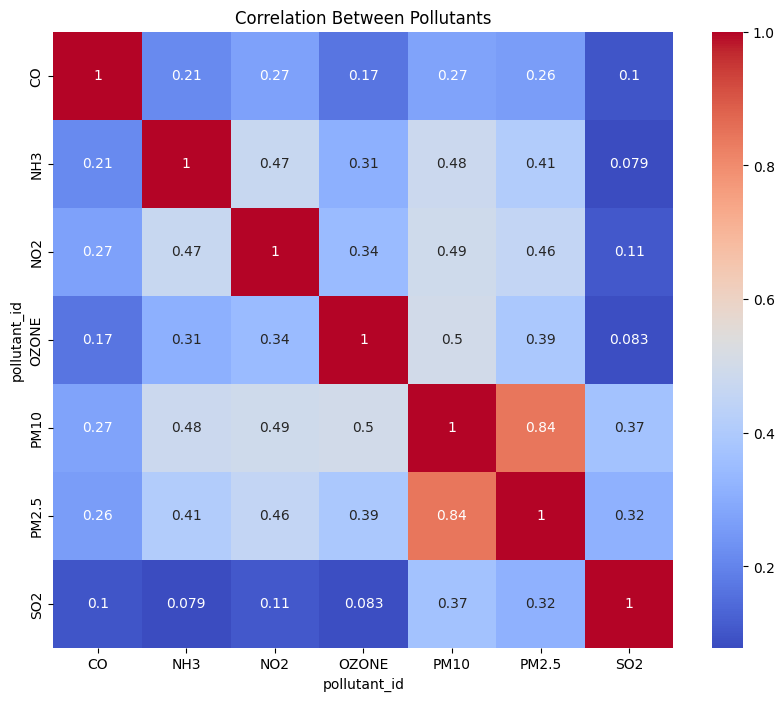

In [14]:
# Pivot table for pollutant averages
pivot_df = data.pivot_table(index=['city', 'station'], columns='pollutant_id', values='pollutant_avg')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Pollutants')
plt.show()

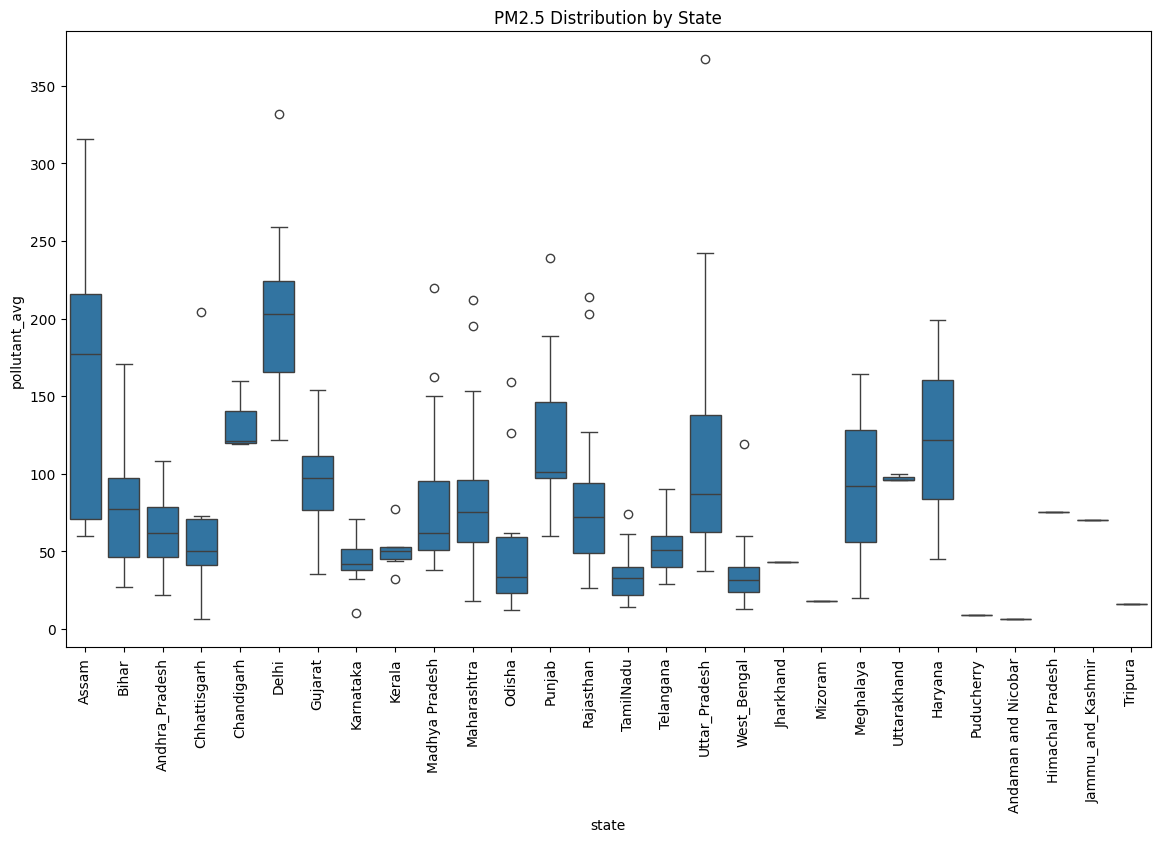

In [15]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data[data['pollutant_id'] == 'PM2.5'], x='state', y='pollutant_avg')
plt.xticks(rotation=90)
plt.title('PM2.5 Distribution by State')
plt.show()

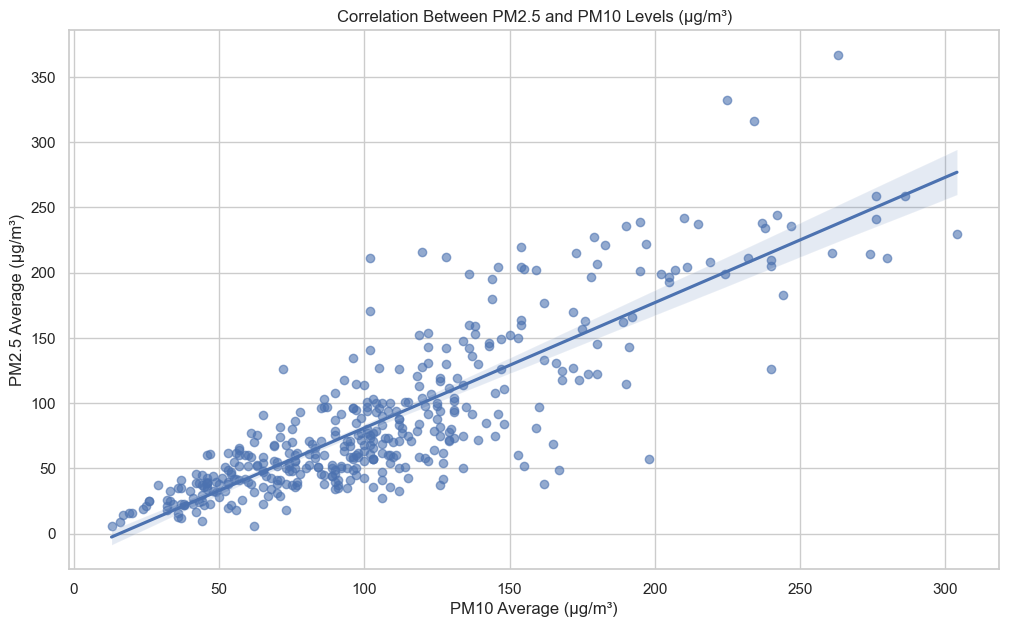

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("Air Quality in Indian Cities.csv")

# Pivot to align PM2.5 and PM10 values for the same stations
pivot_df = df.pivot_table(
    index=["city", "station", "latitude", "longitude"],
    columns="pollutant_id",
    values="pollutant_avg",
    aggfunc="first"
).reset_index()

# Filter valid PM2.5 and PM10 data
plot_df = pivot_df.dropna(subset=["PM2.5", "PM10"])

# Create scatter plot
plt.figure(figsize=(12, 7))
sns.regplot(x="PM10", y="PM2.5", data=plot_df, scatter_kws={"alpha": 0.6})
plt.title("Correlation Between PM2.5 and PM10 Levels (µg/m³)")
plt.xlabel("PM10 Average (µg/m³)")
plt.ylabel("PM2.5 Average (µg/m³)")
plt.grid(True)
plt.show()